In [48]:
# Load packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split


%matplotlib inline

In [2]:
df = pd.read_csv('Credit Card Customer Data.csv')
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [3]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


In [4]:
df.drop(columns = ['Sl_No', 'Customer Key'], inplace = True)
df.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


Avg_Credit_Limit
Skew : 2.2


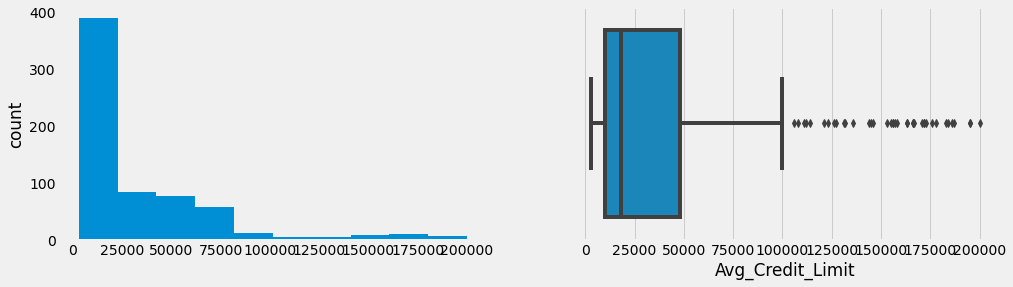

Total_Credit_Cards
Skew : 0.14


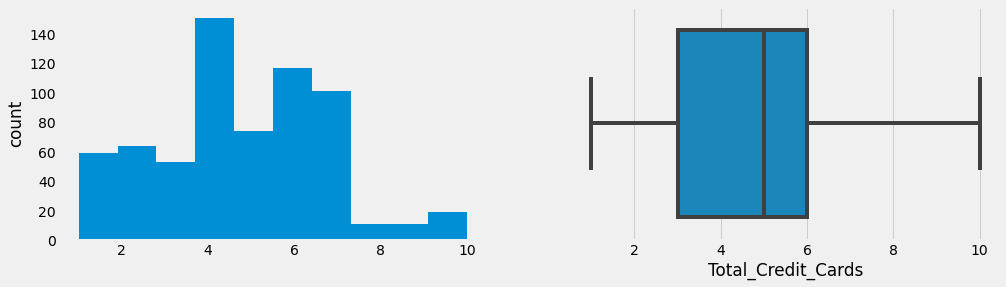

Total_visits_bank
Skew : 0.14


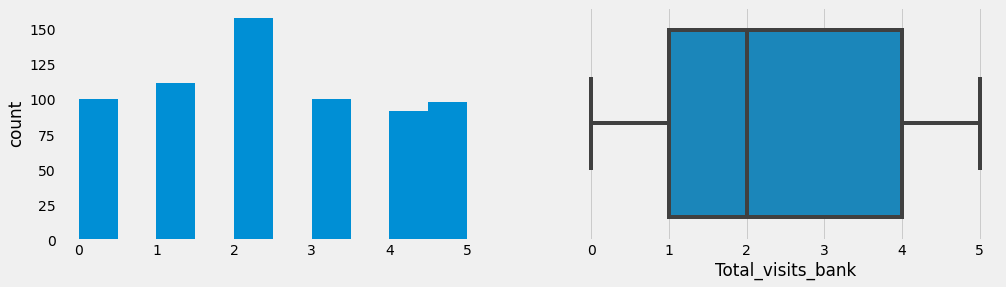

Total_visits_online
Skew : 2.23


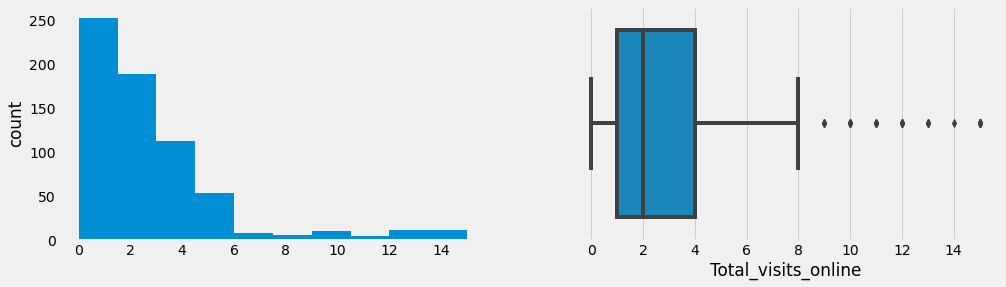

Total_calls_made
Skew : 0.66


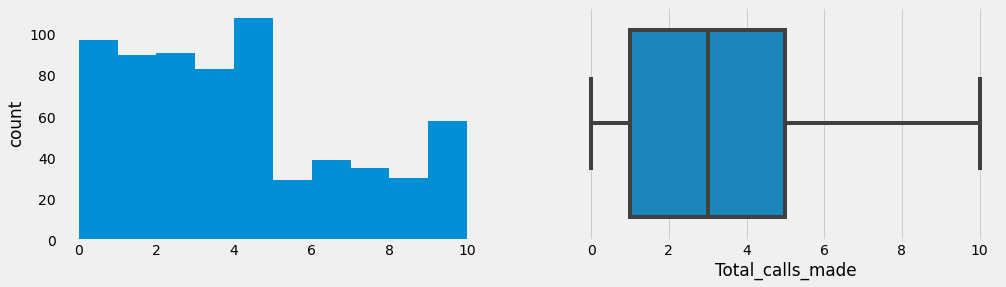

In [5]:
plt.style.use('fivethirtyeight')

for col in df.columns:
    print(col)
    print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    df[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=df[col])
    plt.show()

<AxesSubplot:>

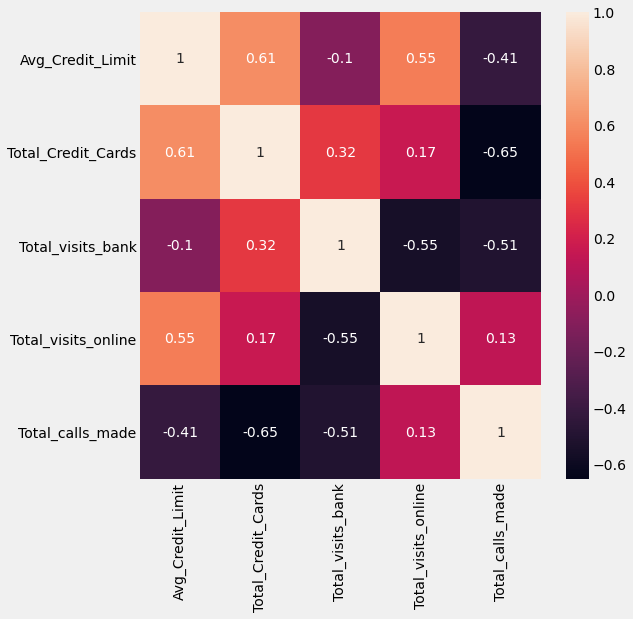

In [6]:
#correlation matrix
corrmat= df.corr()
plt.figure(figsize=(8,8))  
sns.heatmap(corrmat,annot=True)

In [7]:
X_train, X_test = train_test_split(df, test_size=0.5)
print(X_train.head(), X_test.head())
print (X_train.shape)
print (X_test.shape)

     Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
497             52000                   4                  2   
396             73000                   6                  4   
407             50000                   5                  4   
563             69000                   5                  4   
335             19000                   6                  5   

     Total_visits_online  Total_calls_made  
497                    1                 2  
396                    2                 0  
407                    0                 1  
563                    1                 0  
335                    2                 0        Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
189              6000                   3                  2   
202              5000                   1                  0   
142              9000                   4                  1   
139             19000                   1                  0   
199              7000    

In [8]:
# Standardize the training dataset

Xz = pd.DataFrame(stats.zscore(X_train), columns=X_train.columns)
Xz_test = pd.DataFrame(stats.zscore(X_test), columns=X_test.columns)
Xz.head()


,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,0.467371,-0.417091,-0.339027,-0.491865,-0.536503
1,1.039712,0.548804,0.897204,-0.154411,-1.248961
2,0.412862,0.065856,0.897204,-0.829319,-0.892732
3,0.930694,0.065856,0.897204,-0.491865,-1.248961
4,-0.432022,0.548804,1.515319,-0.154411,-1.248961


C:\Users\Rajkumar.Krishnan\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Rajkumar.Krishnan\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


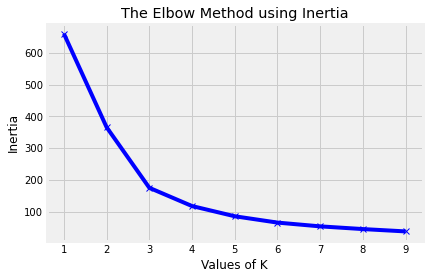

In [64]:
# Implement Elbow method to determine optimum k value

from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

distortions = []
clusters = []
inertias = []
mapping1 = {}
mapping2 = {}

K = range(1, 10, 1)

X = Xz[['Avg_Credit_Limit','Total_Credit_Cards']]
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    clusters.append(kmeanModel)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

# Plot Elbow method using Inertia

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

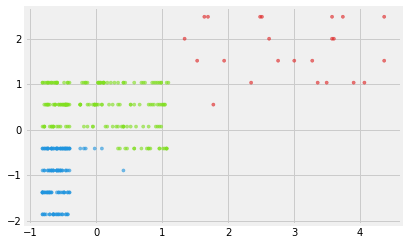

In [67]:
kmeans_testcc = KMeans(n_clusters = 3).fit(Xz_test)


Xz['cluster'] = kmeans_testcc.fit_predict(Xz[['Avg_Credit_Limit','Total_Credit_Cards']])

centroids = kmeans_testcc.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
Xz['cen_x'] = Xz.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
Xz['cen_y'] = Xz.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
Xz['c'] = Xz.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

plt.scatter(Xz.Avg_Credit_Limit, Xz.Total_Credit_Cards, c=Xz.c, alpha = 0.6, s=10)

C:\Users\Rajkumar.Krishnan\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Rajkumar.Krishnan\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


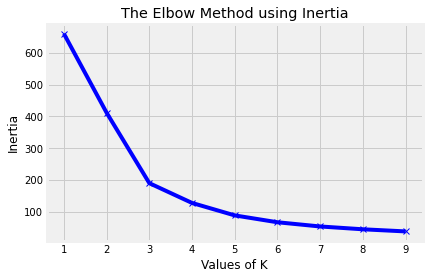

In [61]:
distortions = []
clusters = []
inertias = []
mapping1 = {}
mapping2 = {}

K = range(1, 10, 1)

X = Xz[['Avg_Credit_Limit','Total_visits_bank']]
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    clusters.append(kmeanModel)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

# Plot Elbow method using Inertia

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

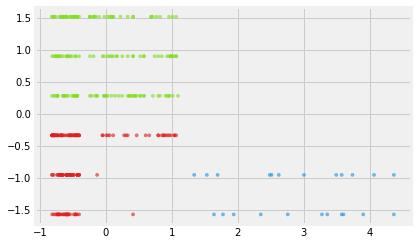

In [76]:
kmeans_testcc = KMeans(n_clusters = 3).fit(Xz_test)


Xz['cluster'] = kmeans_testcc.fit_predict(Xz[['Avg_Credit_Limit','Total_visits_bank']])

centroids = kmeans_testcc.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
Xz['cen_x'] = Xz.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
Xz['cen_y'] = Xz.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
Xz['c'] = Xz.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

plt.scatter(Xz.Avg_Credit_Limit, Xz.Total_visits_bank, c=Xz.c, alpha = 0.6, s=10)

C:\Users\Rajkumar.Krishnan\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Rajkumar.Krishnan\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


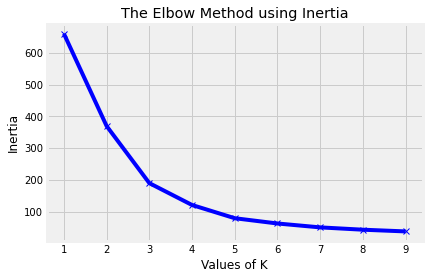

In [70]:
distortions = []
clusters = []
inertias = []
mapping1 = {}
mapping2 = {}

K = range(1, 10, 1)

X = Xz[['Avg_Credit_Limit','Total_calls_made']]
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    clusters.append(kmeanModel)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_

# Plot Elbow method using Inertia

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

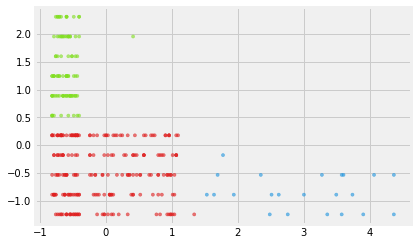

In [77]:
kmeans_testcc = KMeans(n_clusters = 3).fit(Xz_test)


Xz['cluster'] = kmeans_testcc.fit_predict(Xz[['Avg_Credit_Limit','Total_calls_made']])

centroids = kmeans_testcc.cluster_centers_
cen_x = [i[0] for i in centroids] 
cen_y = [i[1] for i in centroids]
## add to df
Xz['cen_x'] = Xz.cluster.map({0:cen_x[0], 1:cen_x[1], 2:cen_x[2]})
Xz['cen_y'] = Xz.cluster.map({0:cen_y[0], 1:cen_y[1], 2:cen_y[2]})
# define and map colors
colors = ['#DF2020', '#81DF20', '#2095DF']
Xz['c'] = Xz.cluster.map({0:colors[0], 1:colors[1], 2:colors[2]})

plt.scatter(Xz.Avg_Credit_Limit, Xz.Total_calls_made, c=Xz.c, alpha = 0.6, s=10)

In [74]:
# Implement Elbow method to determine optimum k value

Xz = pd.DataFrame(stats.zscore(X_train), columns=X_train.columns)
Xz_test = pd.DataFrame(stats.zscore(X_test), columns=X_test.columns)

distortions = []
clusters = []
inertias = []
mapping1 = {}
mapping2 = {}

K = range(1, 10, 1)

X = Xz
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    clusters.append(kmeanModel)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    inertias.append(kmeanModel.inertia_)
    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]
    mapping2[k] = kmeanModel.inertia_


C:\Users\Rajkumar.Krishnan\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Rajkumar.Krishnan\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


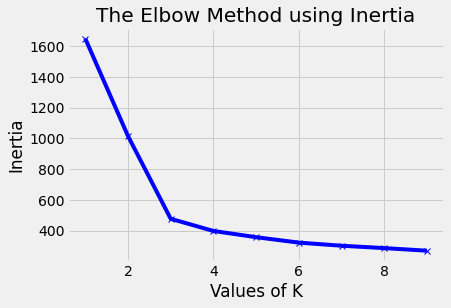

In [10]:
# Plot Elbow method using Inertia

plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

In [11]:
# User Silhouette method to determine optimum k value by identifying cluster number with largest Silhouette score

from sklearn.metrics import silhouette_score

for i in range(1,9,1):
    
    print(clusters[i])
    print("Silhouette score:",silhouette_score(Xz, clusters[i].predict(Xz)))

KMeans(n_clusters=2)
Silhouette score: 0.4287180738659571
KMeans(n_clusters=3)
Silhouette score: 0.5218731777938659
KMeans(n_clusters=4)
Silhouette score: 0.34596721471158715
KMeans(n_clusters=5)
Silhouette score: 0.34099394259597293
KMeans(n_clusters=6)
Silhouette score: 0.26311309064899036
KMeans(n_clusters=7)
Silhouette score: 0.24937530046802242
KMeans()
Silhouette score: 0.24714275183412576
KMeans(n_clusters=9)
Silhouette score: 0.2531556305635391


In [12]:
# Again run k‐means clustering on the training data set, specifying k = 3 clusters.

kmeans_train = KMeans(n_clusters = 3).fit(Xz)
cluster = kmeans_train.labels_
Cluster1 = Xz.loc[cluster == 0]
Cluster2 = Xz.loc[cluster == 1]
Cluster3 = Xz.loc[cluster == 2]
Cluster1.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,204.000000,204.000000,204.000000,204.000000,204.000000
mean,-0.021203,0.385454,0.618446,-0.538182,-0.515548
std,0.606289,0.533435,0.692108,0.278390,0.508290
min,-0.813583,-0.417091,-0.957142,-0.829319,-1.248961
25%,-0.568294,0.065856,0.279088,-0.829319,-0.892732
50%,-0.132225,0.548804,0.897204,-0.491865,-0.536503
75%,0.467371,1.031751,1.515319,-0.154411,-0.180274
max,1.094220,1.031751,1.515319,-0.154411,0.175956


In [13]:
Cluster2.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,23.000000,23.000000,23.000000,23.000000,23.000000
mean,2.910781,1.745673,-1.252762,2.926693,-0.861756
std,0.947067,0.615546,0.315705,0.977529,0.320661
min,1.339509,0.548804,-1.575257,1.195406,-1.248961
25%,2.143512,1.273225,-1.575257,2.207768,-1.248961
50%,3.002024,1.514698,-0.957142,3.220131,-0.892732
75%,3.587992,2.480593,-0.957142,3.557585,-0.536503
max,4.364740,2.480593,-0.957142,4.232494,-0.180274


In [14]:
Cluster3.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,103.000000,103.000000,103.000000,103.000000,103.000000
mean,-0.607985,-1.153234,-0.945140,0.412381,1.213517
std,0.160005,0.509870,0.489472,0.438750,0.716128
min,-0.813583,-1.865932,-1.575257,-0.491865,-0.892732
25%,-0.718193,-1.382985,-1.575257,0.183043,0.888414
50%,-0.595548,-1.382985,-0.957142,0.520498,1.244643
75%,-0.513785,-0.900038,-0.339027,0.857952,1.957102
max,0.412862,-0.417091,-0.339027,2.545223,2.313331


In [15]:
# Perform k‐means clustering on the test data set, specifying k = 3 clusters.

kmeans_test = KMeans(n_clusters = 3).fit(Xz_test)
cluster_test = kmeans_test.labels_ # Cluster membership
Cluster1_test = Xz_test.loc[cluster_test == 0]
Cluster2_test = Xz_test.loc[cluster_test == 1]
Cluster3_test = Xz_test.loc[cluster_test == 2]
Cluster1_test.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,120.000000,120.000000,120.000000,120.000000,120.000000
mean,-0.582053,-0.982250,-0.863381,0.243044,1.096618
std,0.120979,0.504680,0.494364,0.392587,0.676144
min,-0.813347,-1.579423,-1.384756,-0.605909,0.116391
25%,-0.683407,-1.579423,-1.384756,-0.260572,0.459327
50%,-0.605443,-1.134325,-0.771374,0.430102,1.145201
75%,-0.475502,-0.689227,-0.157992,0.430102,1.488138
max,-0.371550,-0.244129,-0.157992,0.775439,2.174011


In [16]:
Cluster2_test.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,183.000000,183.000000,183.000000,183.000000,183.000000
mean,-0.025611,0.354199,0.710127,-0.564394,-0.588223
std,0.576054,0.516748,0.707937,0.302182,0.493867
min,-0.761371,-1.134325,-0.771374,-0.951246,-1.255356
25%,-0.579455,-0.244129,-0.157992,-0.951246,-0.912420
50%,-0.059694,0.200968,0.455390,-0.605909,-0.569483
75%,0.447073,0.646066,1.068771,-0.260572,-0.226546
max,1.707493,1.091164,1.682153,0.084765,0.116391


In [17]:
Cluster3_test.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,27.000000,27.000000,27.000000,27.000000,27.000000
mean,2.760490,1.964874,-0.975835,2.745138,-0.887017
std,0.905987,0.558682,0.294659,1.003695,0.299659
min,1.291685,0.200968,-1.384756,1.466113,-1.255356
25%,1.954380,1.536262,-1.384756,1.811450,-1.255356
50%,2.902943,1.981359,-0.771374,2.847461,-0.912420
75%,3.565639,2.426457,-0.771374,3.538135,-0.569483
max,4.306298,2.426457,-0.771374,4.228809,-0.569483


C:\Users\Rajkumar.Krishnan\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

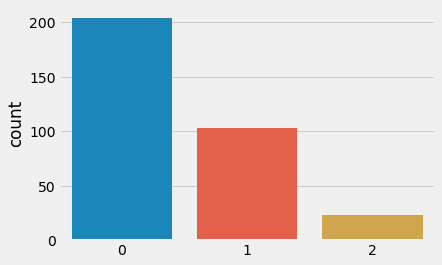

In [18]:
y_clusters = kmeans_train.fit_predict(Xz)
sns.countplot(y_clusters)

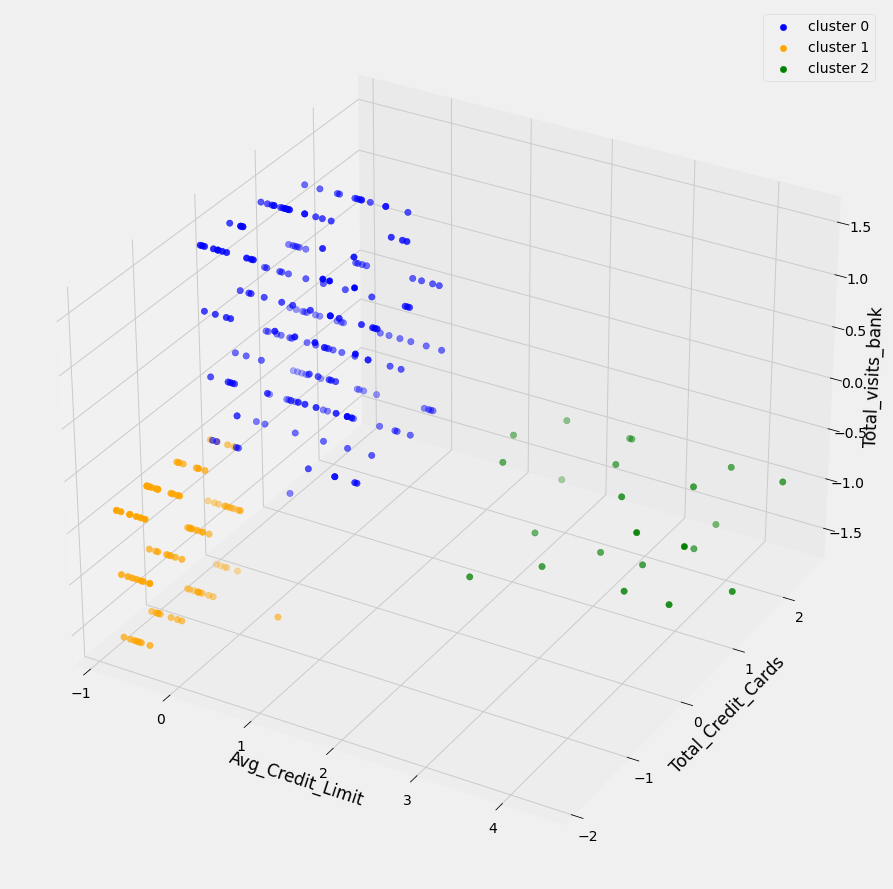

In [19]:
# 3d scatterplot of training data clusters

x = Xz[['Avg_Credit_Limit','Total_Credit_Cards','Total_visits_bank']].values

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x[y_clusters == 0,0],x[y_clusters == 0,1],x[y_clusters == 0,2], s = 40 , color = 'blue', label = "cluster 0")
ax.scatter(x[y_clusters == 1,0],x[y_clusters == 1,1],x[y_clusters == 1,2], s = 40 , color = 'orange', label = "cluster 1")
ax.scatter(x[y_clusters == 2,0],x[y_clusters == 2,1],x[y_clusters == 2,2], s = 40 , color = 'green', label = "cluster 2")

ax.set_xlabel('Avg_Credit_Limit')
ax.set_ylabel('Total_Credit_Cards')
ax.set_zlabel('Total_visits_bank')
ax.legend()
plt.show()